# Experiment 1: All metrics / Default parameters / Synthetic data

## Setup

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

In [19]:
project_root_path = os.path.join('..', '..')
experiment_path = os.path.join(project_root_path, 'experiments', 'allmetrics_defparams_syn')
results_path = os.path.join(experiment_path, 'results')

save_fig_path = os.path.join(experiment_path, 'figures')
os.makedirs(save_fig_path, exist_ok=True)

In [20]:
def load_results(csv_file):
    return pd.read_csv(csv_file, index_col=0)

result_files = [file for file in os.listdir(results_path) if file.endswith('.csv')]
print(f'Number of result files: {len(result_files)}')

Number of result files: 715


In [128]:
# color_palette = {
#     'FF-VUS-PR': 'lightgreen',      # Good, 
#     'FF-VUS-PR-GPU': 'lightblue',   # Very Good
#     'AUC-PR': 'lightcoral',         # Secondary competitor
#     'VUS-PR': 'orange',             # Main competitor
#     'RF': 'lightgrey',              # Useless competitors
#     'AFFILIATION': 'lightgrey',     # Useless competitors
#     'RANGE-AUC-PR': 'lightgrey',    # Useless competitors
# }
# color_palette = {
#     'FF-VUS-PR': 'limegreen',          # Good
#     'FF-VUS-PR-GPU': 'dodgerblue',     # Very Good
#     'AUC-PR': 'salmon',                # Secondary competitor
#     'VUS-PR': 'darkorange',            # Main competitor
#     'RF': 'silver',                    # Useless competitors
#     'AFFILIATION': 'gainsboro',        # Useless competitors
#     'RANGE-AUC-PR': 'lightgrey',       # Useless competitors
# }

# color_palette = {
#     'FF-VUS-PR': '#99cae4',          # Good
#     'FF-VUS-PR-GPU': '#40da70',     # Very Good
#     'AUC-PR': '#f1a73f',                # Secondary competitor
#     'VUS-PR': '#b02a41',            # Main competitor
#     'RF': '#a6d2c3',                    # Useless competitors
#     'AFFILIATION': '#95bdaf',        # Useless competitors
#     'RANGE-AUC-PR': '#84a89c',       # Useless competitors
# }

formal_names = {
    'FF-VUS-PR': 'FF-VUS (L: 128)',
    'FF-VUS-PR-GPU': 'FF-VUS-GPU (L: 128)',
    'AUC-PR': 'AUC',
    'VUS-PR': 'VUS (L: 128)',
    'RF': 'RF',
    'AFFILIATION': 'AFFILIATION',
    'RANGE-AUC-PR': 'Range-AUC (L: 128)',
}

color_palette = {
    'FF-VUS (L: 128)': '#eee13f',          # Good
    'FF-VUS-GPU (L: 128)': '#40da70',     # Very Good
    'AUC': '#f1a73f',                # Secondary competitor
    'VUS (L: 128)': '#b02a41',            # Main competitor
    'RF': '#95bdaf',                    # Useless competitors
    'AFFILIATION': '#95bdaf',        # Useless competitors
    'Range-AUC (L: 128)': '#95bdaf',       # Useless competitors
}

In [129]:
# Initialize an empty DataFrame to store the combined data
df = pd.DataFrame()

# Read and combine all files
for file in tqdm(result_files):
    file_path = os.path.join(results_path, file)
    curr_df = pd.read_csv(file_path, index_col=0)
    df = pd.concat([df, curr_df], ignore_index=True)

df['Metric'] = df['Metric'].map(formal_names)
df.sample(3)

100%|████████████████████████████████████████| 715/715 [00:03<00:00, 238.11it/s]


,Time series,Length,Number of anomalies,Anomalies average length,Slope size,Step,Global mask,Slopes,Existence,Confusion matrix,...,Position time,Slopes time,Existence time,Confusion matrix time,Precision recall curve time,Integral time,Metric,Metric value,Metric time,Anomaly Coordinates time
6491,syn_1000000_5_10000_9.npy,1000000,5,10430.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,RF,0.269256,6.039267,NaN
464,syn_100000000_10_1000_3.npy,100000000,10,1078.10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AUC,0.915713,38.777191,NaN
3831,syn_100000_50_10_2.npy,100000,50,9.38,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,RF,0.833877,0.467371,NaN


## Analysis

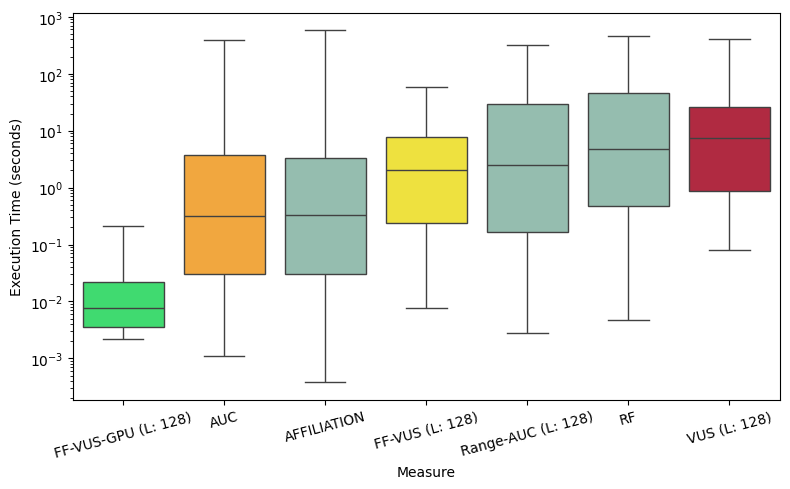

In [130]:
# TODO: Find why there is this big lines per metric, what affects this

# What is the execution time difference
median_times = df.groupby('Metric')['Metric time'].median()
order = median_times.sort_values().index.to_list()

plt.figure(figsize=(8, 5))
sns.boxplot(
    y='Metric time', 
    x='Metric', 
    hue='Metric', 
    data=df, 
    showfliers=False, 
    log_scale=True, 
    palette=color_palette, 
    order=order, 
    saturation=1,
    # showmeans=True, 
    # meanline=True
)
plt.xlabel('Measure')
plt.ylabel('Execution Time (seconds)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig(os.path.join(save_fig_path, 'exec_time_comparison.svg'))
plt.show()

In [131]:
# # What is the error between the difference metrics
# plt.figure(figsize=(8, 5))
# metrics = df['Metric'].unique()

# values_df = df[['Time series', 'Metric', 'Metric value']]
# values_df = values_df.pivot(columns='Metric', index='Time series', values='Metric value')
# dif_df = values_df.copy()
# for metric in metrics: 
#     dif_df[metric] = values_df[metric] - values_df['AUC-PR']
# dif_df

# sns.boxplot(dif_df.abs(), showfliers=True, palette=color_palette, order=order, saturation=1, showmeans=True, meanline=True)
# plt.xlabel('Measure')
# plt.ylabel('Error to AUC-PR')
# plt.tight_layout()
# plt.savefig(os.path.join(save_fig_path, 'error_to_aucpr.svg'))
# plt.show()

Total number of time series: 1122
Total number of points: 29749380000, 29749380k, 29749m, 29b
Length min: 1000, max: 1000000000
Number of anomalies min: 1, max: 9006
Anomalies average length min: 1.0, max: 13642.5


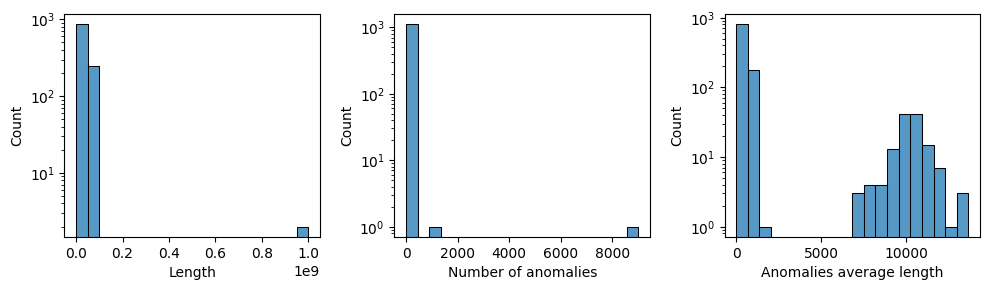

In [132]:
# Synthetic dataset insights
curr_df = df[df['Metric'] == 'AUC']
print(f"Total number of time series: {curr_df.shape[0]}")
print(f"Total number of points: {curr_df['Length'].sum()}, {curr_df['Length'].sum()//10**3}k, {curr_df['Length'].sum()//10**6}m, {curr_df['Length'].sum()//10**9}b")\

attributes = ["Length", "Number of anomalies", "Anomalies average length"]
attr_control = {}
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
bins = 20
for attr, axis in zip(attributes, ax):
    print(f"{attr} min: {curr_df[attr].min()}, max: {curr_df[attr].max()}")
    fig = sns.histplot(x=attr, data=curr_df, ax=axis, bins=bins)
    axis.set_yscale('log')
    axis.set_xlabel(attr)
plt.tight_layout()
plt.show()

In [ ]:
# TODO [DONE]: Change one time series characteristic while keeping the rest the same
# TODO: Add specific symbol for time outs
# TODO: Add xticks for all values, add specific text for 1 million and 1 billion
# TODO: Add Avg TSB length, + other big public datasets
# TODO: Add real life examples of points on the plot, like 1 day of ECG, etc
for attr in attributes:
    df[f'{attr} bin'] = pd.qcut(df[attr], q=bins, duplicates='drop')
    attr_control[attr] = df[f'{attr} bin'].value_counts().idxmax()

attr_axis = {
    "Length": (2, 1, 1), 
    "Number of anomalies": (2, 2, 3), 
    "Anomalies average length": (2, 2, 4)
}
fig = plt.figure(figsize=(10, 6))
for i, attribute in enumerate(attributes):
    axis = fig.add_subplot(*attr_axis[attribute])

    mask = pd.Series(True, index=df.index)
    for attr in attributes:
        if attr != attribute:
            mask &= (df[f'{attr} bin'] == attr_control[attr])
    curr_df = df[mask]
    print('FIX')
    print(sorted(curr_df['Length'].unique()))
    print(sorted(df['Length'].unique()))
    
    # Group by bin and metric, compute mean
    grouped = (
        curr_df
        .groupby([f'{attribute} bin', 'Metric'], observed=False)['Metric time']
        .mean()
        .reset_index()
    )

    # Convert bin to the midpoint for plotting
    grouped['bin_center'] = grouped[f'{attribute} bin'].apply(lambda x: x.mid)

    # Plot
    sns.lineplot(
        x='bin_center',
        y='Metric time',
        hue='Metric',
        data=grouped,
        ax=axis,
        palette=color_palette,
        markers=True,
        style='Metric',
        dashes = False,
        sizes=(.5, 2)
    )

    # axis.set_title(f"Metric Time vs {attribute}")
    axis.set_xlabel(attribute)
    axis.set_ylabel("Execution time (seconds)" if i != 2 else "")
    axis.set_yscale('log')
    axis.set_xscale('log')
    axis.grid(axis='both', alpha=0.5)
    if i != 0: 
        axis.get_legend().remove()

plt.tight_layout()
plt.savefig(os.path.join(save_fig_path, 'exec_time_per_attr.svg'))
plt.show()

FIX
[1000, 10000, 100000, 1000000, 10000000, 100000000]
[1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
FIX
[1000000]
[1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
FIX
[1000000]
[1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
